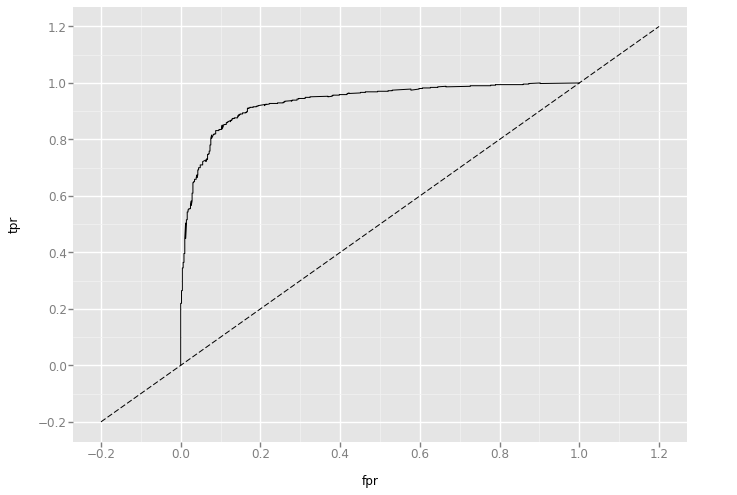

<ggplot: (117814549866)>

In [2]:
# Imports

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
from ggplot import *

# Create synthetic dataset and split the data into training/testing  

X, y = make_classification(n_samples = 10000, n_features = 10, n_classes = 2, n_informative = 5)
Xtrain = X[:9000]
Xtest = X[9000:]
ytrain = y[:9000]
ytest = y[9000:]


# Build the Logistic Regression model
clf = LogisticRegression()

# Fit the model

clf.fit(Xtrain, ytrain)

# Create predictions

preds = clf.predict_proba(Xtest)[:,1]

# Get False Positive Rate and True Positive Rate

fpr, tpr, _ = metrics.roc_curve(ytest, preds)

# Create dataframe

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

# Plot the chart

ggplot(df, aes(x="fpr", y="tpr")) +\
    geom_line() +\
    geom_abline(linetype = "dashed")

In [4]:
# Calculate AuC

auc = metrics.auc(fpr, tpr)

print(auc)

0.934273709484
